In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train_df = pd.read_csv("house_prices_advanced/train.csv")

In [3]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#train_df.isnull().sum()

In [7]:
drop_col = ["Alley","PoolQC","MiscFeature","Fence","Id"]

In [8]:
train_df.drop(drop_col,axis=1,inplace=True)

In [9]:
train_df.shape

(1460, 76)

In [10]:
cols=train_df.columns[train_df.isnull().any()].tolist()
cols

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [11]:
categorical_columns = train_df.select_dtypes(["object"]).columns
numerical_columns = train_df.select_dtypes(["int64", "float64"]).columns

In [12]:
corr_matrix = train_df[numerical_columns].corr()

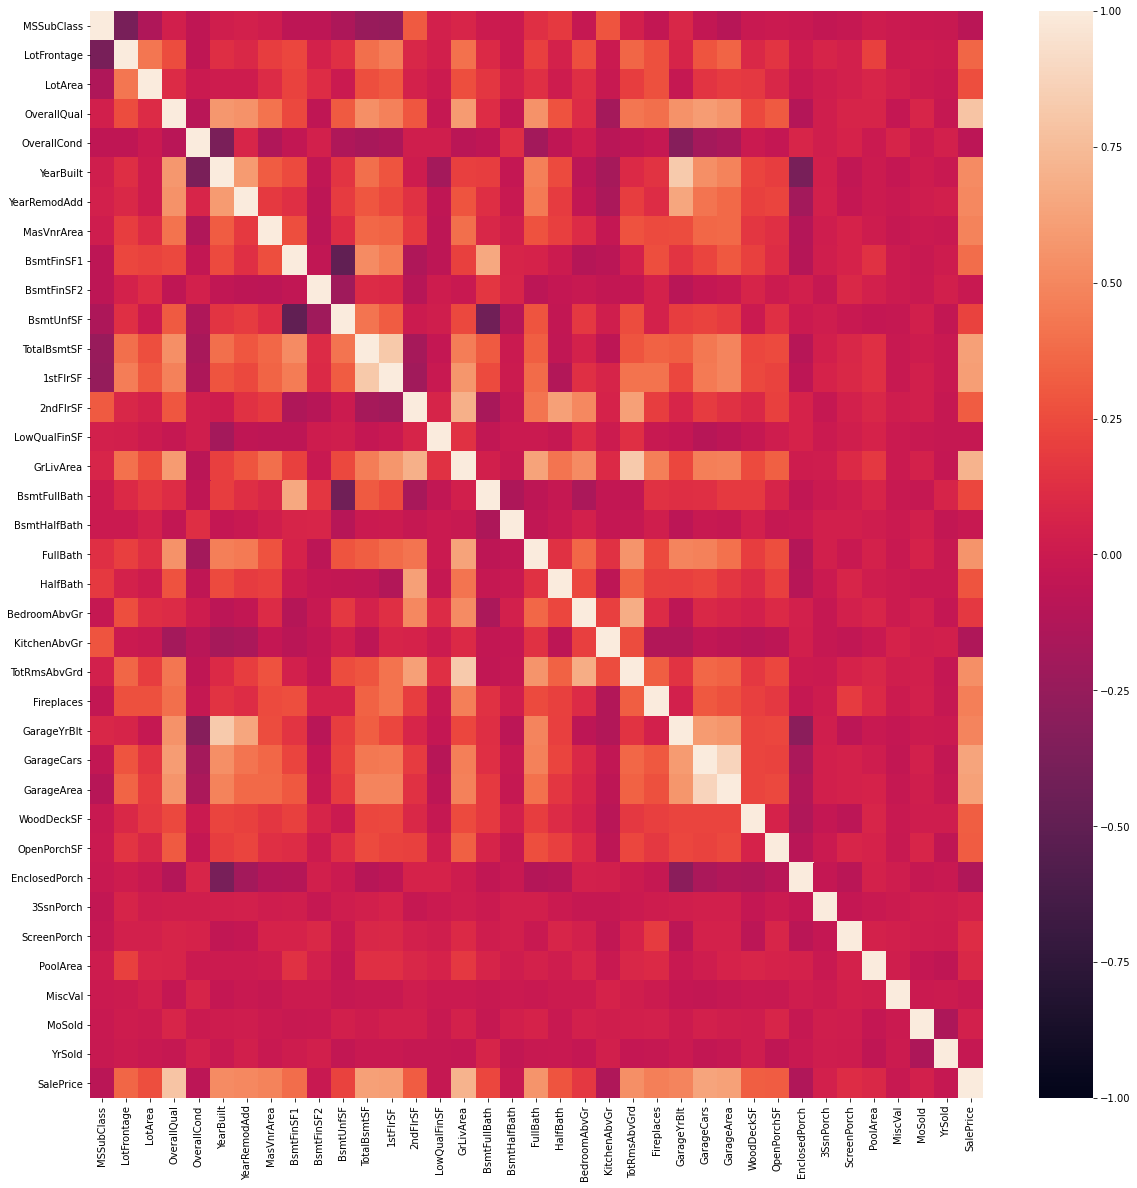

In [13]:
fig = plt.figure(figsize=(20,20))

sns.heatmap(corr_matrix, vmax=1.0, vmin=-1.0)
plt.show()


In [14]:
top_corr_features = np.abs(corr_matrix).nlargest(10, "SalePrice").index

In [15]:
top_corr_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

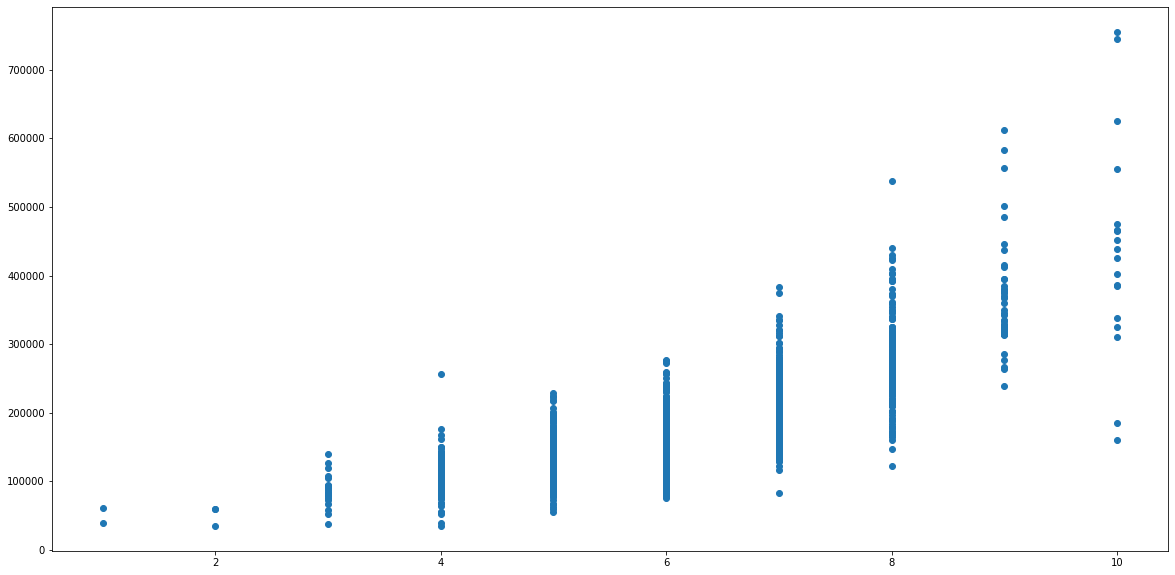

In [16]:
plt.figure(figsize=(20, 10))

plt.scatter(x=train_df["OverallQual"], y=train_df["SalePrice"])
plt.show()

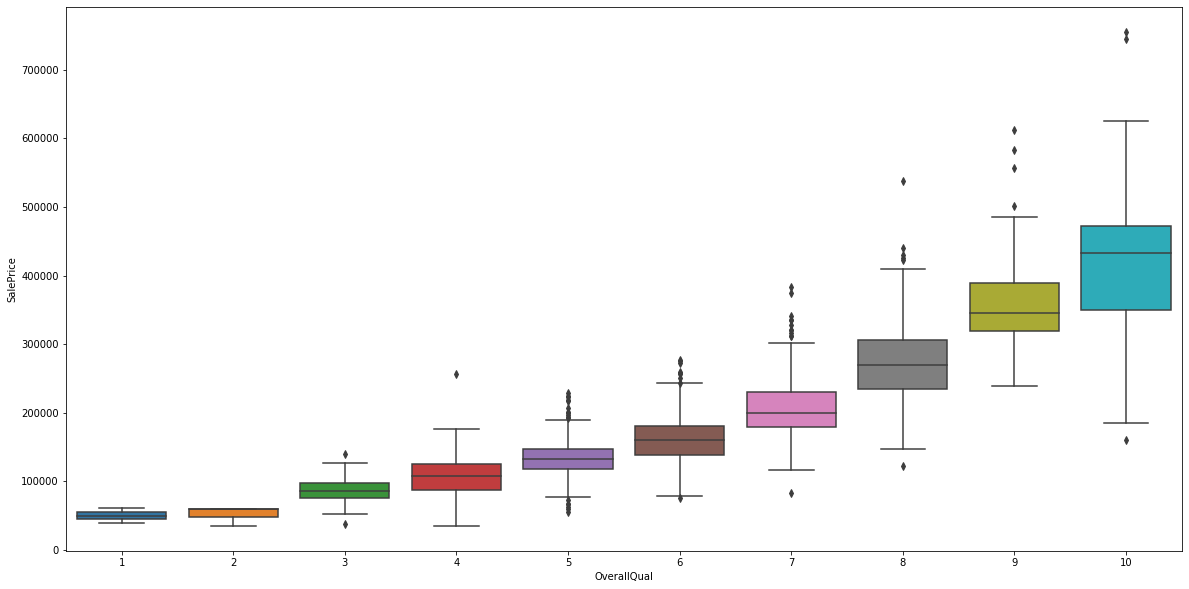

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train_df, x="OverallQual", y="SalePrice")

plt.show()

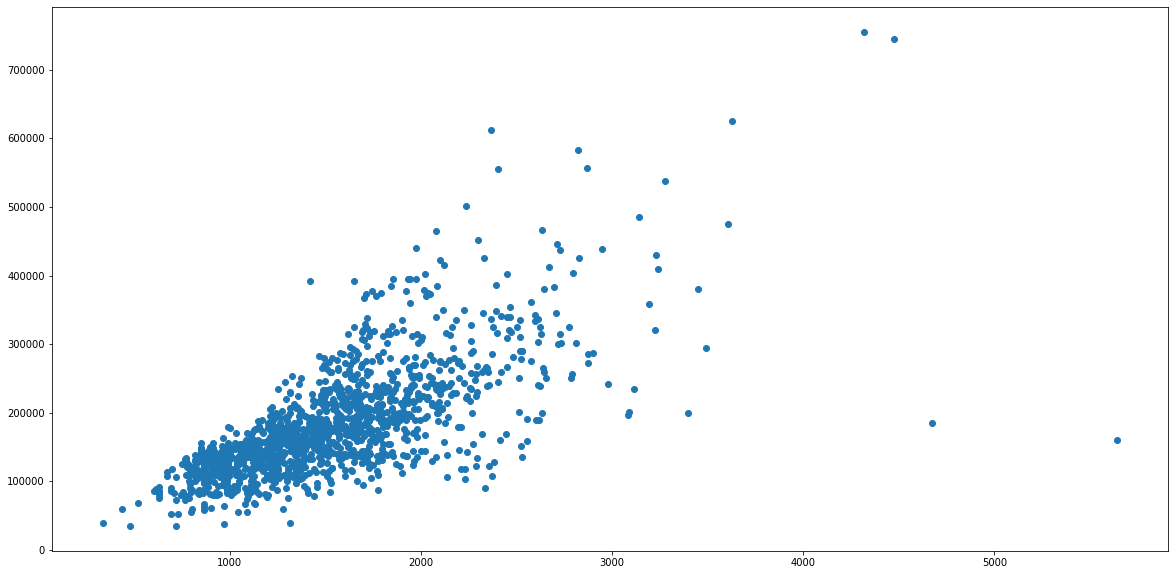

In [18]:
plt.figure(figsize=(20, 10))

plt.scatter(x=train_df["GrLivArea"], y=train_df["SalePrice"])
plt.show()

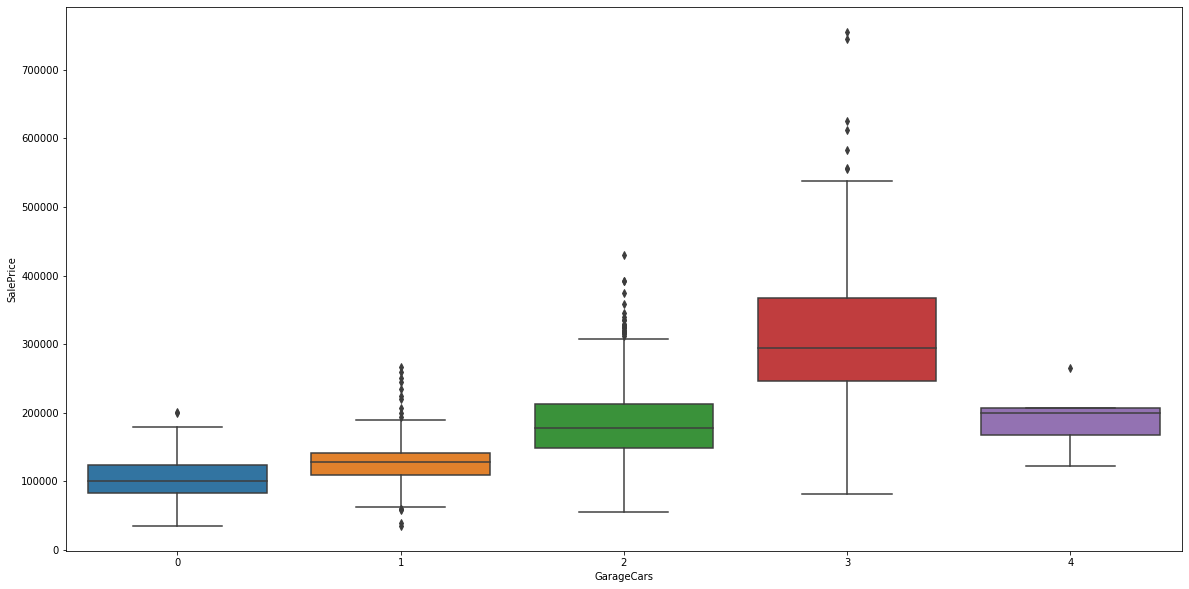

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(data=train_df, x="GarageCars", y="SalePrice")

plt.show()

In [20]:
gb = train_df.groupby("Neighborhood")

In [21]:
len(gb.groups.keys())

25

In [22]:
def impute(x):
    # print(x.shape)
    print(x.mean())
    return x.fillna(x.mean())

In [23]:
train_df["LotFrontage"] = gb["LotFrontage"].apply(impute)

47.142857142857146
24.0
21.5625
57.509803921568626
83.46153846153847
71.68253968253968
71.8048780487805
68.21739130434783
79.87755102040816
62.5
27.8
70.08333333333333
76.46236559139786
32.285714285714285
81.28888888888889
91.87878787878788
81.88157894736842
62.788990825688074
58.91304347826087
74.4375
71.5
64.66666666666667
62.7
80.13333333333334
59.714285714285715


In [24]:
train_df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [25]:
app_col=["MSSubClass","OverallQual","OverallCond"]

In [26]:
categorical_columns = categorical_columns.tolist()
for col in app_col:
    categorical_columns.append(col)

In [27]:
for col in cols:
    if col in categorical_columns:
        train_df[col]=train_df[col].fillna(train_df[col].mode()[0])
    else:
        train_df[col]=train_df[col].fillna(train_df[col].mean())

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [29]:
test_df=pd.read_csv('formulatedtest.csv')

In [30]:
test_df.shape

(1459, 75)

In [31]:
df=train_df.drop(columns="SalePrice")

In [32]:
from sklearn.preprocessing import LabelEncoder 

In [33]:
le = LabelEncoder()

In [34]:
for col in categorical_columns:
    df[col]=le.fit_transform(df[col])

In [35]:
categorical_columns2 = test_df.select_dtypes(["object"]).columns

In [36]:
for col in categorical_columns2:
    test_df[col]=le.fit_transform(test_df[col])

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [131]:
de_reg = DecisionTreeRegressor(max_depth=4,min_samples_split=5,min_samples_leaf=5)

In [132]:
de_reg.fit(df,train_df["SalePrice"],)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, min_samples_split=5)

In [133]:
de_reg.score(df,train_df["SalePrice"])

0.799265567403868

In [134]:
y_pred = de_reg.predict(test_df)

In [135]:
final_pred=pd.DataFrame()
final_pred['SalePrice'] = y_pred

In [136]:
import pickle

In [137]:
filename = 'kaggle_house_price_model'
outfile = open(filename,'wb')

In [138]:
pickle.dump(final_pred,outfile)
outfile.close()